In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
#Analysis:- data set contains 15 cilumns and 205 rows.
            #no null values.
            #7 numerical columns and 8 categorical columns.

In [6]:
df.isnull().sum()/len(df)*100

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
width                0.0
height               0.0
engine-type          0.0
engine-size          0.0
horsepower           0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [7]:
num_cols=df.select_dtypes(include=["int","float"]).columns
num_cols

Index(['symboling', 'width', 'height', 'engine-size', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
obj_cols=df.select_dtypes(include=["object"]).columns
obj_cols

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [9]:
for i in obj_cols:
    print(i)
    print(df[i].unique())

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
horsepower
['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' 

In [10]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)
df["horsepower"]=df["horsepower"].astype("float")


In [11]:
df["normalized-losses"]=df["normalized-losses"].replace("?",np.nan)
df["normalized-losses"]=df["normalized-losses"].astype("float")
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].mean())
df.dropna(inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 23.9+ KB


# UNIVARIATE ANALYSIS

In [15]:
#Numerical columns

In [16]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,122.000000,65.901478,53.733498,126.857143,104.256158,25.241379,30.748768,13263.266010
std,1.247384,31.837458,2.154835,2.442864,41.845239,39.714369,6.570702,6.920406,7933.310625
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.050000,52.000000,97.000000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,65.500000,54.100000,119.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,66.900000,55.500000,143.000000,116.000000,30.000000,35.000000,16501.500000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [17]:
num_cols1=df.select_dtypes(include=['int',"float"])

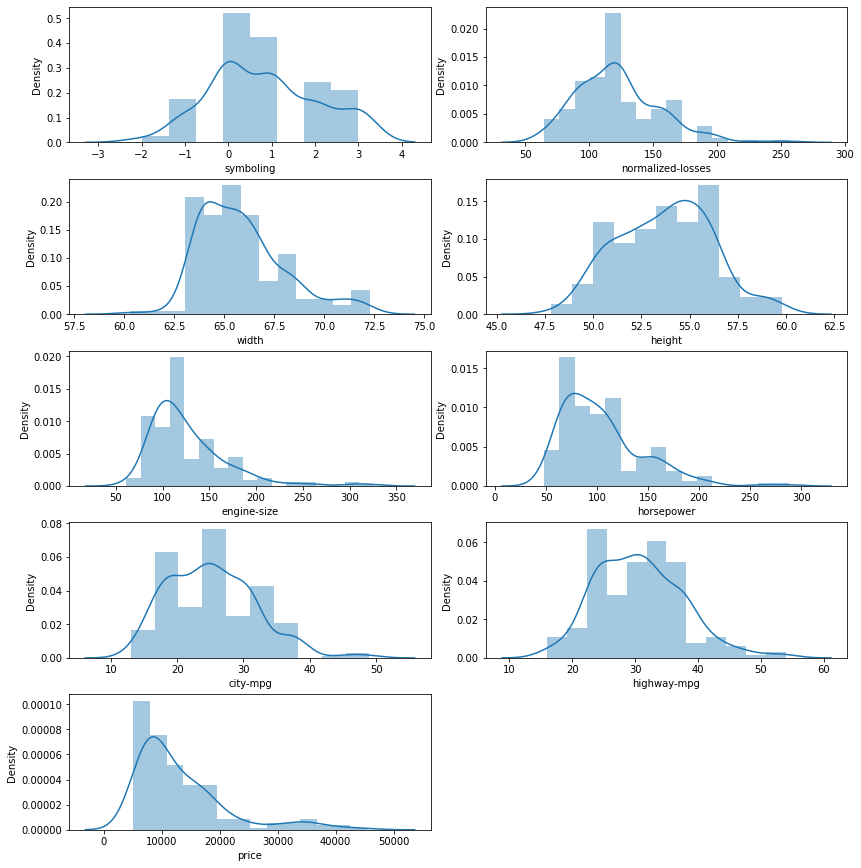

In [18]:
plt.figure(figsize=(12,12))
count=1
for i in num_cols1:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [19]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,122.000000,65.901478,53.733498,126.857143,104.256158,25.241379,30.748768,13263.266010
std,1.247384,31.837458,2.154835,2.442864,41.845239,39.714369,6.570702,6.920406,7933.310625
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.050000,52.000000,97.000000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,65.500000,54.100000,119.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,66.900000,55.500000,143.000000,116.000000,30.000000,35.000000,16501.500000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [20]:
df["price"]=np.log(1+df["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

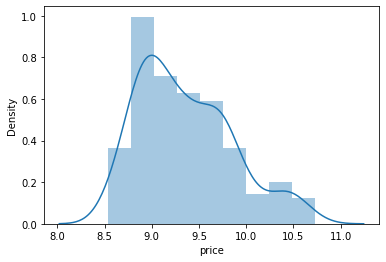

In [21]:
sns.distplot(df["price"])

# OUTLIERS REMOVAL

In [22]:
#sns.boxplot(df["price"])

In [23]:
#df["make"].unique()         #Make affects the price of cars

In [24]:
#plt.figure(figsize=(20,20))
#sns.boxplot(x="price",y="make",data=df)
#plt.show()

In [25]:
#df["make"].value_counts()

# lets remove outliers from toyota

In [26]:
#df[(df["make"]=="toyota")&(df["price"]>14000)]

In [27]:
#lets drop this 5 records

In [28]:
#df.drop(index=[172,178,179,180,181],inplace=True)

In [29]:
#df

# lets remove outliers from mitsubishi

In [30]:
#df[(df["make"]=="mitsubishi")&(df["price"]>13000)]

In [31]:
#df.drop(index=[83,84],inplace=True)
#df

# lets remove outliers from dodge

In [32]:
#df[(df["make"]=="dodge")&(df["price"]>10000)]

In [33]:
#df.drop(index=29,inplace=True)
#df

# Removing outliers from honda

In [34]:
#df[(df["make"]=="honda")&(df["price"]>12000)]

In [35]:
#df.drop(index=41,inplace=True)
#df

# Removing outliers from isuzu

In [36]:
#df[(df["make"]=="isuzu")&(df["price"]>15000)]

In [37]:
#df.drop(index=45,inplace=True)
#df

# Removing outliers from plymouth

In [38]:
#df[(df["make"]=="plymouth")&(df["price"]>10000)]

In [39]:
#df.drop(index=124,inplace=True)
#df

# UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS

In [40]:
obj_cols1=df.select_dtypes(include=["object"]).columns
obj_cols1

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

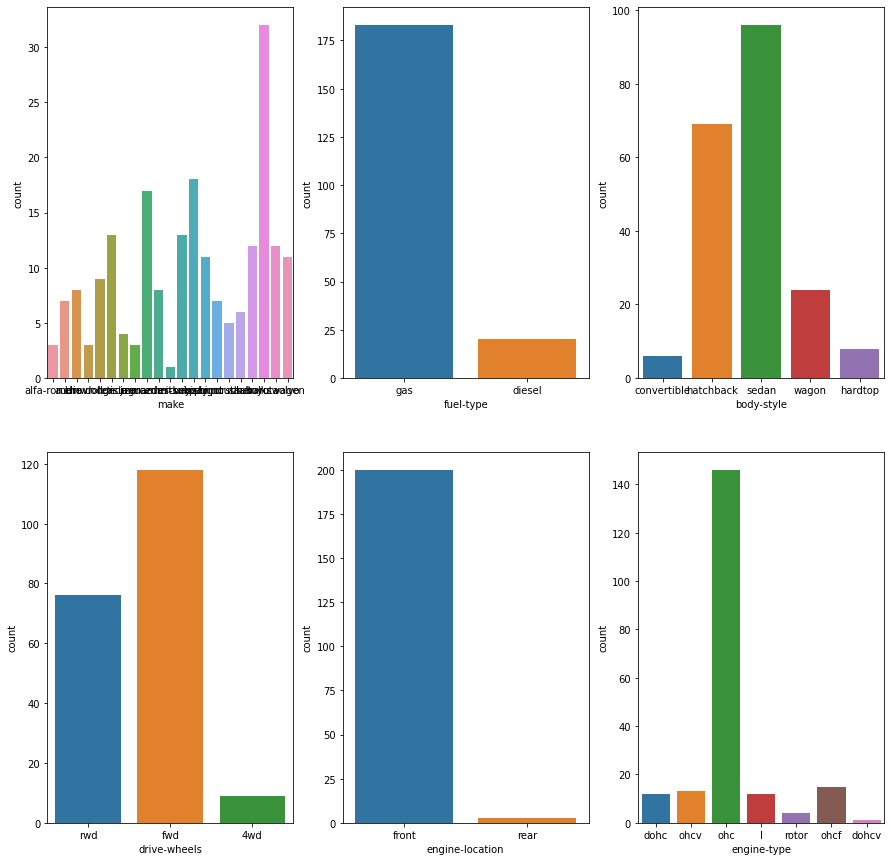

In [41]:
plt.figure(figsize=(15,15))
count=1
for i in obj_cols1:
    plt.subplot(2,3,count)
    sns.countplot(df[i])
    count+=1
plt.show()

In [42]:
obj_cols1

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

# ONE HOT ENCODING

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
df=pd.get_dummies(df,columns=["fuel-type",'body-style',"drive-wheels","engine-location"])

# LABEL ENCODING

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df['make']=le.fit_transform(df["make"])

In [48]:
df["engine-type"]=le.fit_transform(df["engine-type"])

In [49]:
df

,symboling,normalized-losses,make,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,...,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,3,122.0,0,64.1,48.8,0,130,111.0,21,27,...,1,0,0,0,0,0,0,1,1,0
1,3,122.0,0,64.1,48.8,0,130,111.0,21,27,...,1,0,0,0,0,0,0,1,1,0
2,1,122.0,0,65.5,52.4,5,152,154.0,19,26,...,0,0,1,0,0,0,0,1,1,0
3,2,164.0,1,66.2,54.3,3,109,102.0,24,30,...,0,0,0,1,0,0,1,0,1,0
4,2,164.0,1,66.4,54.3,3,136,115.0,18,22,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,95.0,20,68.9,55.5,3,141,114.0,23,28,...,0,0,0,1,0,0,0,1,1,0
199,-1,95.0,20,68.8,55.5,3,141,160.0,19,25,...,0,0,0,1,0,0,0,1,1,0
200,-1,95.0,20,68.9,55.5,5,173,134.0,18,23,...,0,0,0,1,0,0,0,1,1,0
201,-1,95.0,20,68.9,55.5,3,145,106.0,26,27,...,0,0,0,1,0,0,0,1,1,0


In [50]:
df['Price']=df["price"]

In [51]:
df.drop(["price"],axis=1,inplace=True)

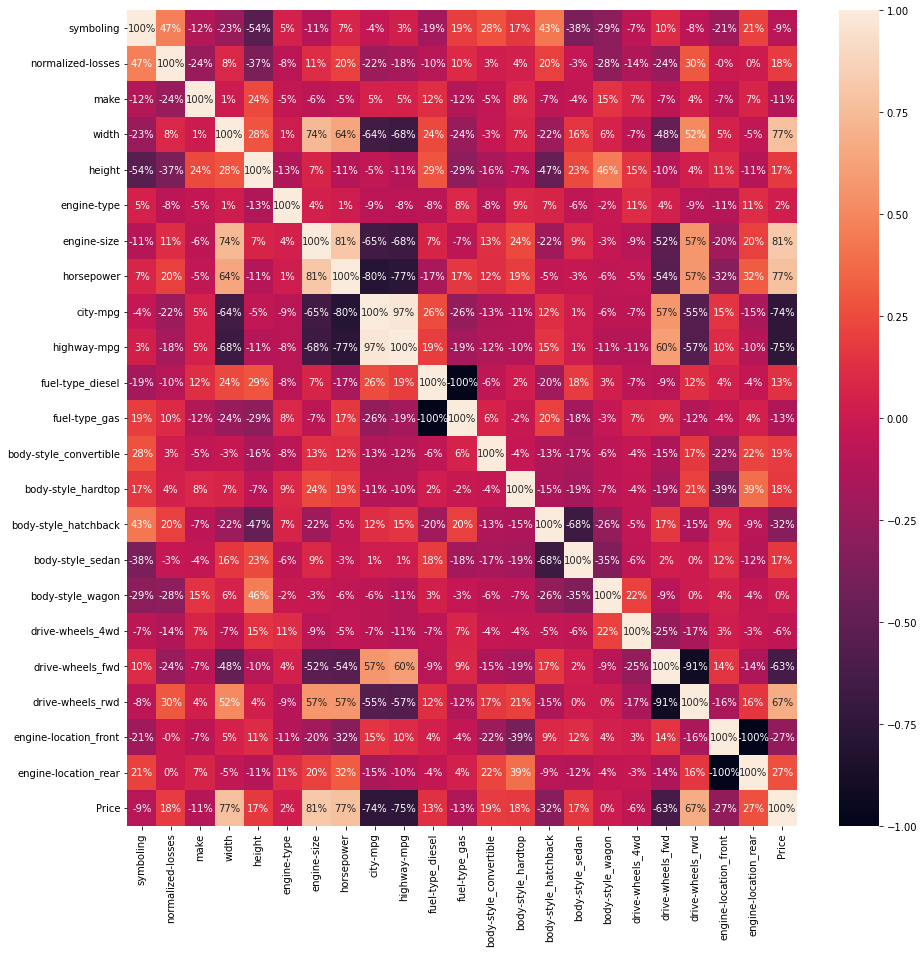

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

# Model building using all features.

In [53]:
X=df.iloc[:,:-1]

In [54]:
Y=df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=85)
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [56]:
from sklearn.model_selection import cross_val_score
le_cv=cross_val_score(le,X,Y,cv=5)
le_cv

array([0.86779285, 0.82845714, 0.67155199, 0.60132301, 0.48961507])

In [57]:
le.fit(X_train,Y_train)
Y_pred_train=le.predict(X_train)
Y_pred_test=le.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_train,Y_pred_train)),2))
print("R2 Score:",round(r2_score(Y_train,Y_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_pred_test)),2))
print("R2 Score:",round(r2_score(Y_test,Y_pred_test),2))

Train Data
RMSE: 0.19
R2 Score: 0.86
Test Data
RMSE: 0.2
R2 Score: 0.84


In [112]:
le.coef_

array([ 0.0477194 , -0.01228454,  0.00422651,  0.00105702, -0.00380151,
       -0.01101303,  0.21499825])

# LASSO AND RIDGE FOR THE SAME.

In [59]:
from sklearn.linear_model import Ridge,Lasso

In [60]:
def metrics(Y_actual,Y_pred):
    r2=r2_score(Y_actual,Y_pred)
    RMSE=np.sqrt(mean_squared_error(Y_actual,Y_pred))
    print("R2 Score: {}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [107]:
l1=Ridge(3)
l1.fit(X_train,Y_train)

Ridge(alpha=3)

In [108]:
y_pred_train=l1.predict(X_train)
y_pred_test=l1.predict(X_test)

In [109]:
print("Training performance")
metrics(Y_train,y_pred_train)
print("Testing performnance")
metrics(Y_test,y_pred_test)

Training performance
R2 Score: 0.86|RMSE:0.19
Testing performnance
R2 Score: 0.85|RMSE:0.19


In [110]:
l1_cv=cross_val_score(l1,X,Y,cv=5)
l1_cv.mean()

0.7027448088758655

In [113]:
l1.coef_

array([ 0.01335496,  0.0005862 , -0.01221565,  0.02961497,  0.02625751,
        0.01796323,  0.00260157,  0.00274166, -0.00870229, -0.0074819 ,
        0.09944795, -0.09944795,  0.11671593, -0.03144693, -0.09068584,
        0.05812301, -0.05270617, -0.0550752 , -0.07109741,  0.12617262,
       -0.15837767,  0.15837767])

In [65]:
l2=Lasso(1)
l2.fit(X_train,Y_train)
y_pred_train1=l2.predict(X_train)
y_pred_test1=l2.predict(X_test)
print("Training performance")
metrics(Y_train,y_pred_train1)
print("Testing performnance")
metrics(Y_test,y_pred_test1)

Training performance
R2 Score: 0.68|RMSE:0.28
Testing performnance
R2 Score: 0.74|RMSE:0.26


In [66]:
l2_cv=cross_val_score(l2,X,Y,cv=5)
l2_cv.mean()

0.6053699631903029

# MODEL BUILDING USING ONLY STRONGLY CORELATED COLUMNS.

In [67]:
X1=df[["width",'city-mpg','engine-size',"horsepower","highway-mpg","drive-wheels_fwd",'drive-wheels_rwd']]

In [68]:
Y1=df.iloc[:,-1]

In [69]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.20,random_state=85)
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [70]:
from sklearn.model_selection import cross_val_score
le_cv=cross_val_score(le,X1,Y1,cv=5)
le_cv

array([0.83479479, 0.78414008, 0.83409629, 0.5937502 , 0.47804155])

In [71]:
le.fit(X1_train,Y1_train)
Y1_pred_train=le.predict(X1_train)
Y1_pred_test=le.predict(X1_test)

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y1_train,Y1_pred_train)),2))
print("R2 Score:",round(r2_score(Y1_train,Y1_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y1_test,Y1_pred_test)),2))
print("R2 Score:",round(r2_score(Y1_test,Y1_pred_test),2))

Train Data
RMSE: 0.24
R2 Score: 0.77
Test Data
RMSE: 0.18
R2 Score: 0.87


In [73]:
l3=Lasso(1)
l3.fit(X1_train,Y1_train)
y1_pred_train1=l3.predict(X1_train)
y1_pred_test1=l3.predict(X1_test)
print("Training performance")
metrics(Y1_train,y1_pred_train1)
print("Testing performnance")
metrics(Y1_test,y1_pred_test1)

Training performance
R2 Score: 0.68|RMSE:0.28
Testing performnance
R2 Score: 0.74|RMSE:0.26


In [74]:
l4=Ridge(11)
l4.fit(X1_train,Y1_train)
y1_pred_train1=l4.predict(X1_train)
y1_pred_test1=l4.predict(X1_test)
print("Training performance")
metrics(Y1_train,y1_pred_train1)
print("Testing performnance")
metrics(Y1_test,y1_pred_test1)

Training performance
R2 Score: 0.77|RMSE:0.24
Testing performnance
R2 Score: 0.87|RMSE:0.18


In [75]:
#X.corrwith(Y).plot(kind="bar")
#plt.show()